<a href="https://colab.research.google.com/github/AliValizade/ML_in_Uni/blob/main/ml_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [ ]:
# Generate dataset with optional noise and non-linearity
def generate_dataset(n_samples=100, n_features=1, noise=0.0, nonlinear=False):
    X = np.random.normal(0, 1, (n_samples, n_features))
    if nonlinear:
        y = (5 * (X.sum(axis=1)) ** 3) + 7 + np.random.normal(0, noise, n_samples)
    else:
        y = 3 * X.sum(axis=1) + 5 + np.random.normal(0, noise, n_samples)
    return X, y

In [ ]:
# Linear regression function
def linear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias column
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

In [ ]:
# Function to compute error metrics
def compute_errors(w, X, y):
    # Add bias term to X
    X = np.c_[np.ones(X.shape[0]), X]
    y_pred = X.dot(w)  # Prediction based on learned weights
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return mse, mae

In [ ]:
# Regression plot function to plot data and regression line
def plot_all_regressions(X_list, y_list, w_list, n_folds, n_features, n_samples, noise):
    fig = plt.figure(figsize=(15, 8))

    for i in range(n_folds):
        X, y, w = X_list[i], y_list[i], w_list[i]

        if n_features > 1:  # 3D plot for nonlinear case
            ax = fig.add_subplot(2, 5, i+1, projection='3d')
            ax.scatter(X[:, 0], X[:, 1], y, label='Data', color='blue')  # Scatter plot in 3D

            X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
            y_pred = X_bias.dot(w)  # Predictions using learned weights

            ax.plot_trisurf(X[:, 0], X[:, 1], y_pred, color='red', alpha=0.5)  # Plot 3D regression plane

            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.set_zlabel('y')
            ax.set_title(f'Fold {i+1} (3D) \n n_samples={n_samples} - noise={noise}')
            ax.legend()

        else:  # 2D plot for linear case
            ax = fig.add_subplot(2, 5, i+1)
            ax.scatter(X[:, 0], y, label='Data', color='blue')  # Plot only the first feature

            X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
            y_pred = X_bias.dot(w)  # Predictions using learned weights
            ax.plot(X[:, 0], y_pred, color='red', label='Regression Line')

            ax.set_title(f'Fold {i+1} \n n_samples={n_samples} - noise={noise}')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('y')
            ax.grid(True)
            ax.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
# Main function to handle k-fold and report errors
def run_experiment(n_samples, n_features, noise, nonlinear, n_splits=10):
    X, y = generate_dataset(n_samples, n_features, noise, nonlinear)
    kf = KFold(n_splits=n_splits)
    errors = []

    # Collect data for regression plots
    X_list, y_list, w_list = [], [], []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train linear regression
        w = linear_regression(X_train, y_train)

        # Store data for regression plots
        X_list.append(X_test)
        y_list.append(y_test)
        w_list.append(w)

        # Compute and store errors
        mse, mae = compute_errors(w, X_test, y_test)
        errors.append((mse, mae))

    # Plot all regression lines after all folds
    plot_all_regressions(X_list, y_list, w_list, n_splits, n_features, n_samples, noise)

    return errors


In [ ]:
# Function to plot MSE and MAE errors
def plot_errors(errors):
    mse_errors = [error[0] for error in errors]  # Extract MSE errors
    mae_errors = [error[1] for error in errors]  # Extract MAE errors
    folds = range(1, len(errors) + 1)

    plt.figure(figsize=(10, 6))

    # Plot MSE
    plt.subplot(1, 2, 1)  # Subplot for MSE
    plt.plot(folds, mse_errors, marker='o', label='MSE', color='blue')
    plt.xlabel('Fold')
    plt.ylabel('Error')
    plt.title('Mean Squared Error (MSE)')
    plt.grid(True)

    # Plot MAE
    plt.subplot(1, 2, 2)  # Subplot for MAE
    plt.plot(folds, mae_errors, marker='o', label='MAE', color='green')
    plt.xlabel('Fold')
    plt.ylabel('Error')
    plt.title('Mean Absolute Error (MAE)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

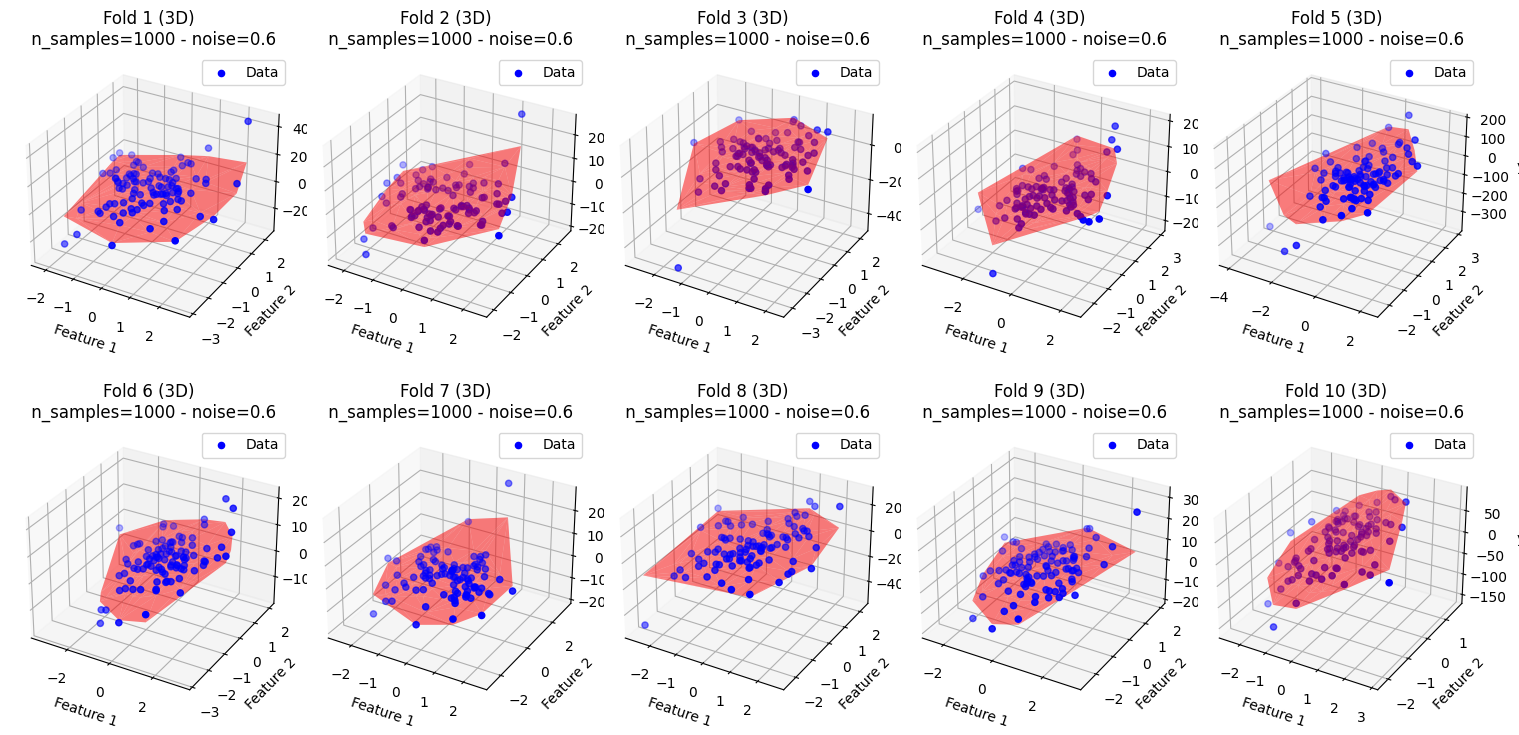

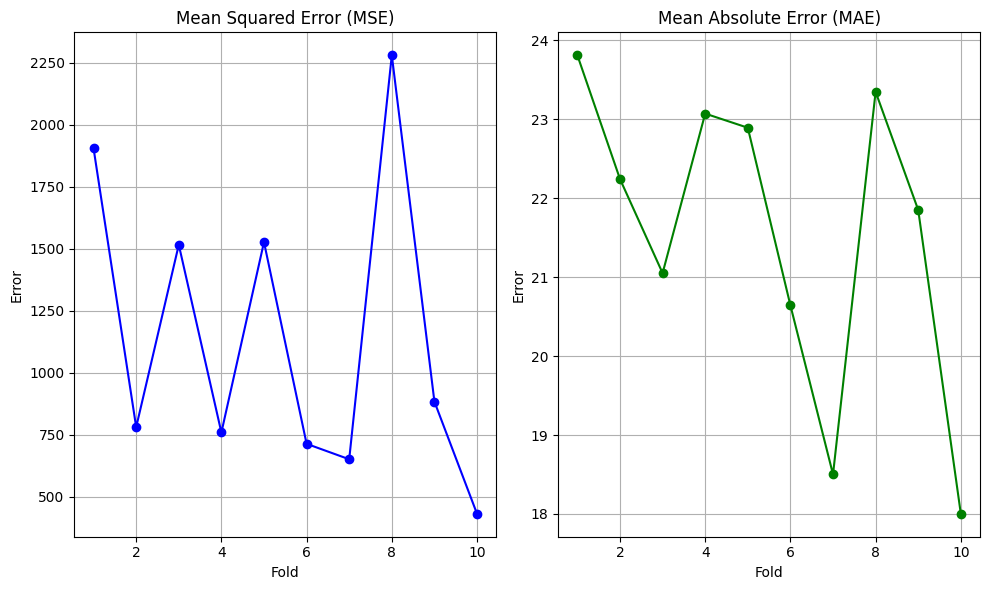

In [ ]:
# Example usage with plotting (Non-Linear Data 3D)
errors = run_experiment(n_samples=1000, n_features=2, noise=0.6, nonlinear=True)
plot_errors(errors)

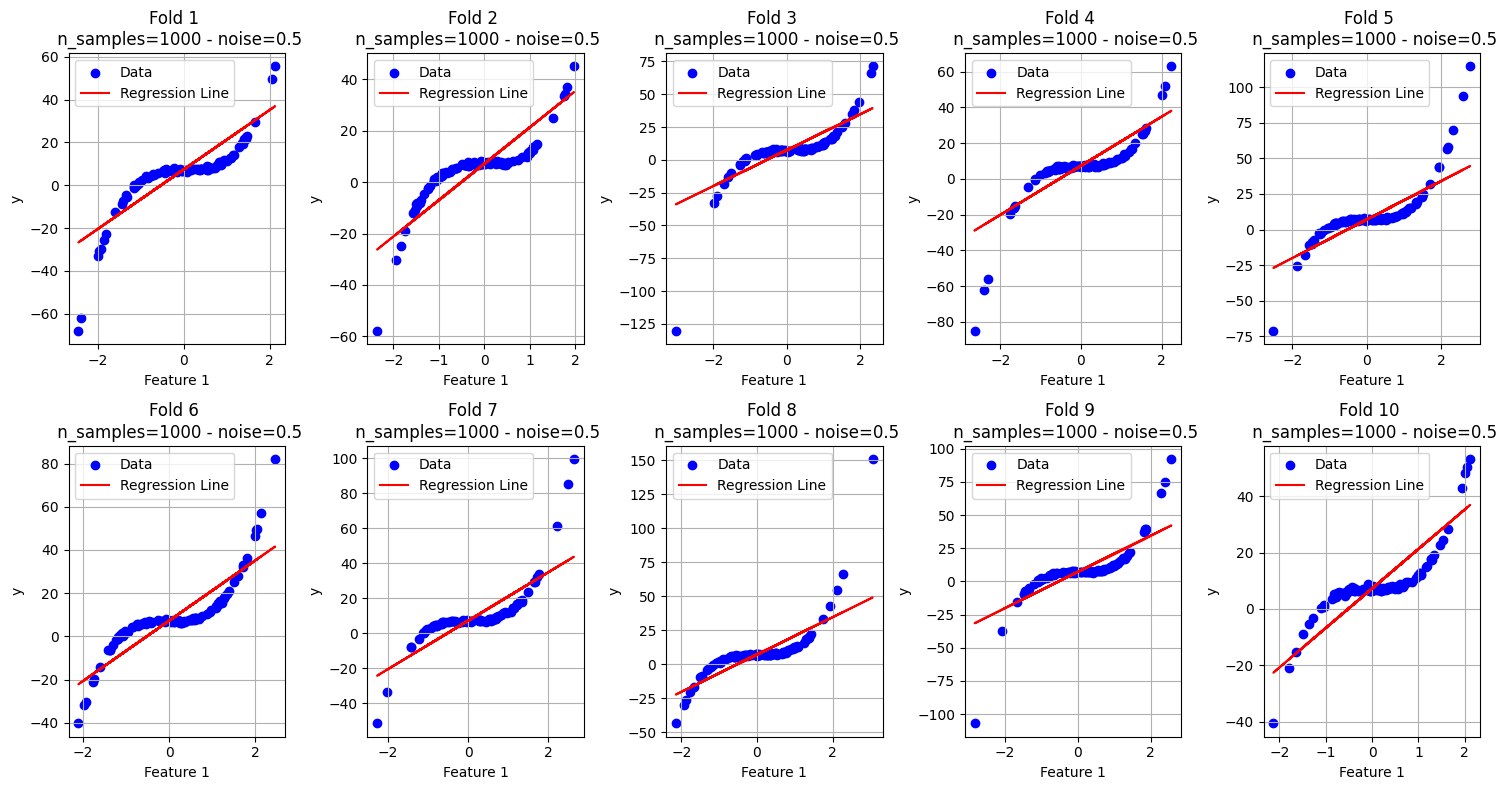

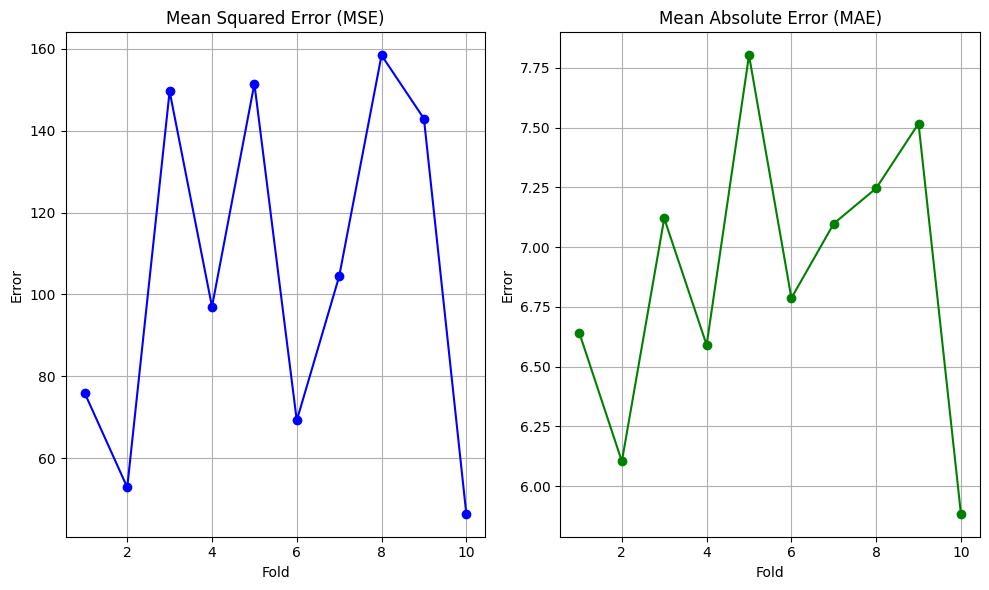

In [ ]:
# Example usage with plotting (Non-Linear Data 2D)
errors = run_experiment(n_samples=1000, n_features=1, noise=0.5, nonlinear=True)
plot_errors(errors)

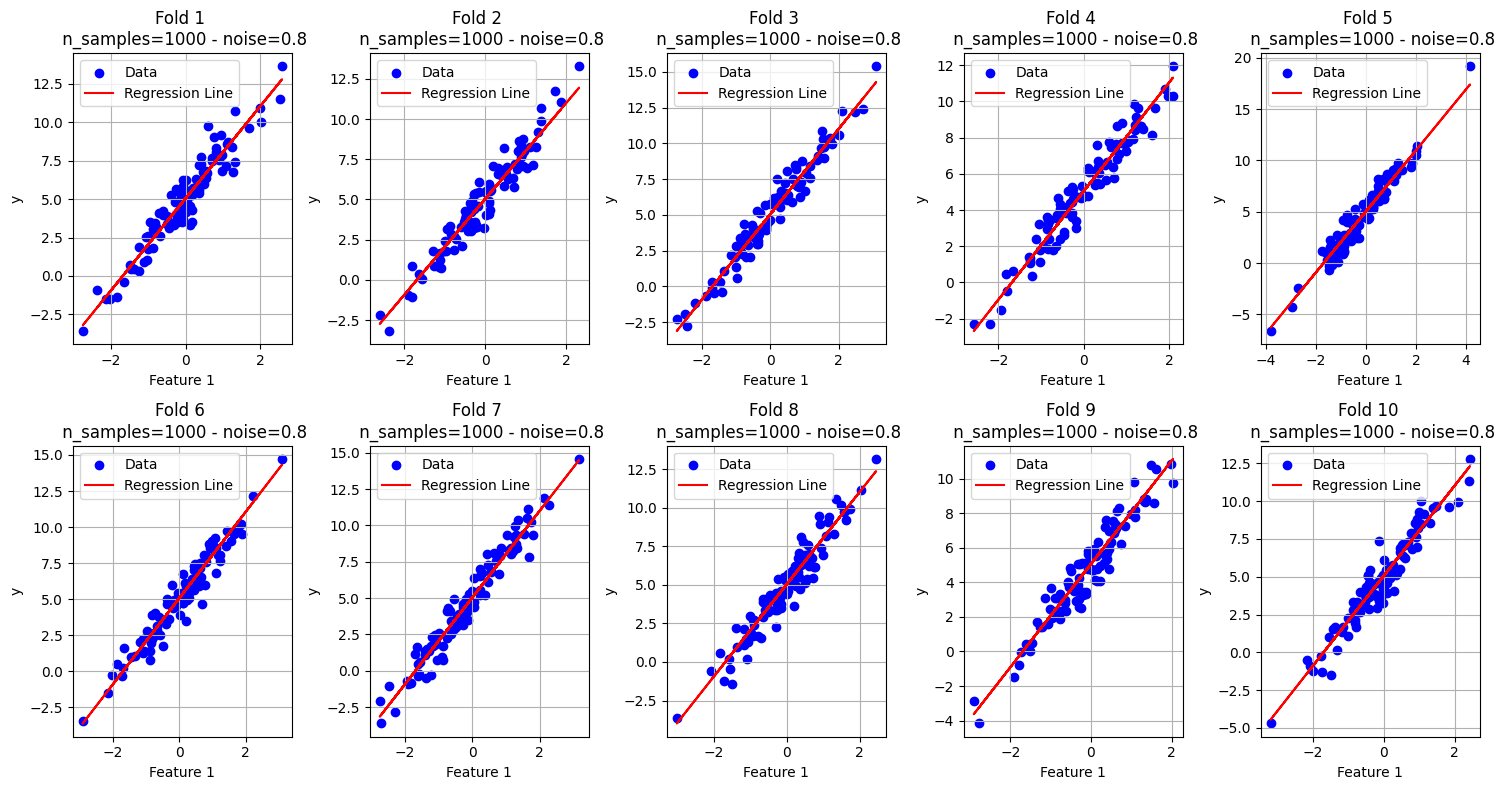

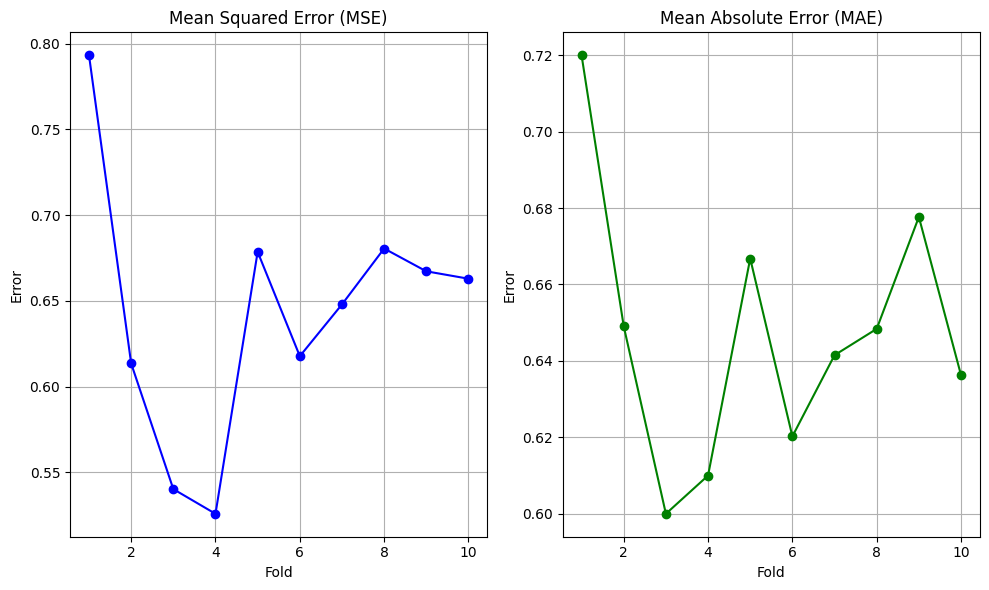

In [ ]:
# Example usage with plotting (Linear Data)
errors = run_experiment(n_samples=1000, n_features=1, noise=0.8, nonlinear=False)
plot_errors(errors)

In [ ]:
# Experiment 1: Effect of Sample Size on Error
def experiment_sample_size_effect(noise, nonlinear):
    sample_sizes = [100, 1000, 10000, 50000, 150000, 500000, 1000000]
    mse_errors = []
    mae_errors = []

    for n_samples in sample_sizes:
        errors = run_experiment(n_samples=n_samples, n_features=1, noise=noise, nonlinear=nonlinear)
        avg_mse = sum([error[0] for error in errors]) / len(errors)
        avg_mae = sum([error[1] for error in errors]) / len(errors)
        mse_errors.append(avg_mse)
        mae_errors.append(avg_mae)

    plt.figure(figsize=(12, 6))

    # Plot MSE
    plt.subplot(1, 2, 1)
    plt.plot(sample_sizes, mse_errors, marker='o', color='blue', label='MSE')
    plt.xscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Effect of Sample Size on MSE')
    plt.grid(True)
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(sample_sizes, mae_errors, marker='o', color='green', label='MAE')
    plt.xscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Effect of Sample Size on MAE')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Experiment 2: Effect of Noise on Error
def experiment_noise_effect(n_samples, nonlinear):
    noise_levels = [0.5, 0.8, 1.3, 1.7, 2.3, 2.8, 5, 8, 13, 20]
    mse_errors = []
    mae_errors = []

    for noise in noise_levels:
        errors = run_experiment(n_samples=n_samples, n_features=1, noise=noise, nonlinear=nonlinear)
        avg_mse = sum([error[0] for error in errors]) / len(errors)
        avg_mae = sum([error[1] for error in errors]) / len(errors)
        mse_errors.append(avg_mse)
        mae_errors.append(avg_mae)

    plt.figure(figsize=(12, 6))

    # Plot MSE
    plt.subplot(1, 2, 1)
    plt.plot(noise_levels, mse_errors, marker='o', color='blue', label='MSE')
    plt.xlabel('Noise Level')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Effect of Noise on MSE')
    plt.grid(True)
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(noise_levels, mae_errors, marker='o', color='green', label='MAE')
    plt.xlabel('Noise Level')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Effect of Noise on MAE')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

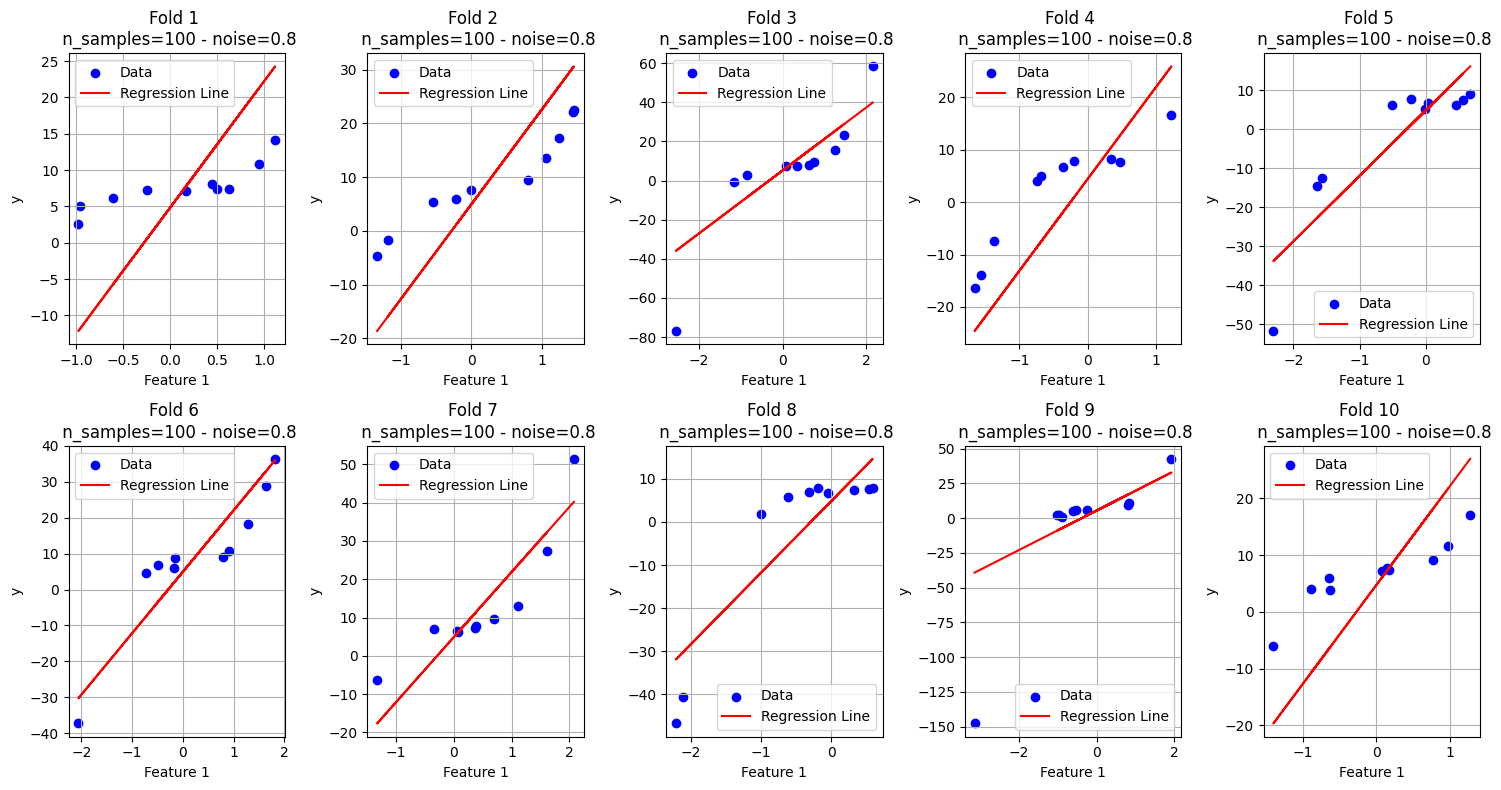

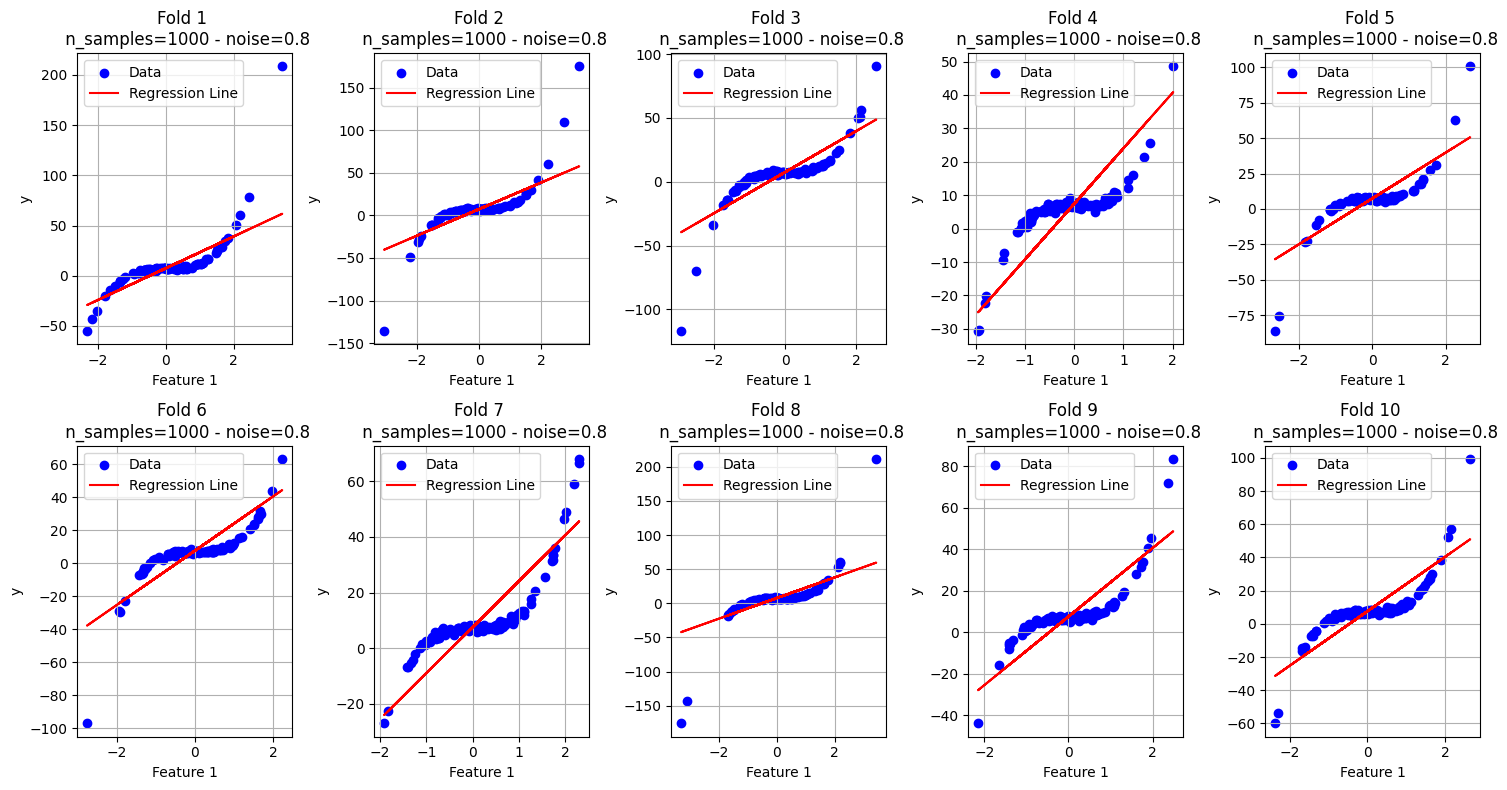

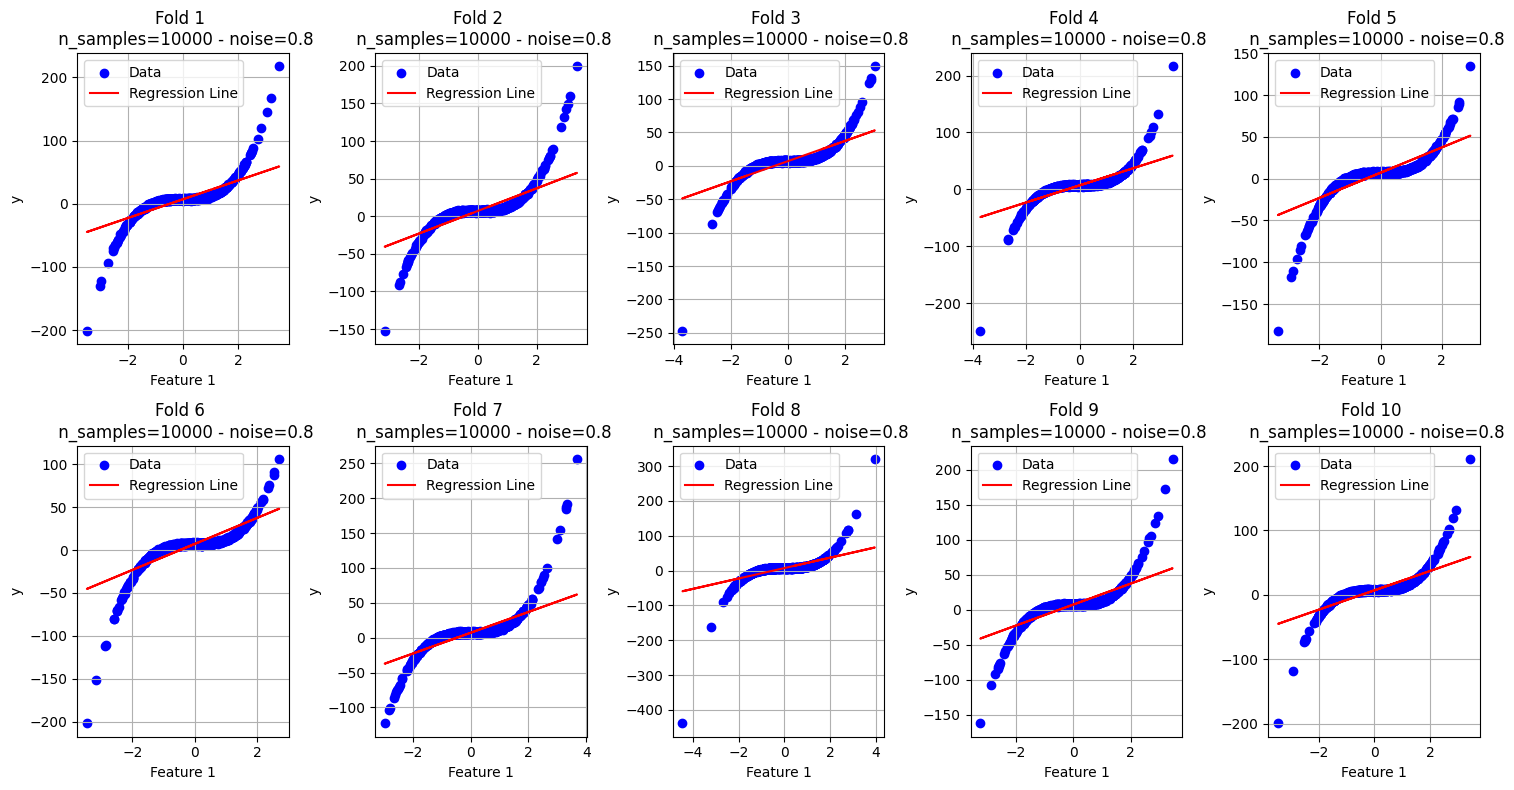

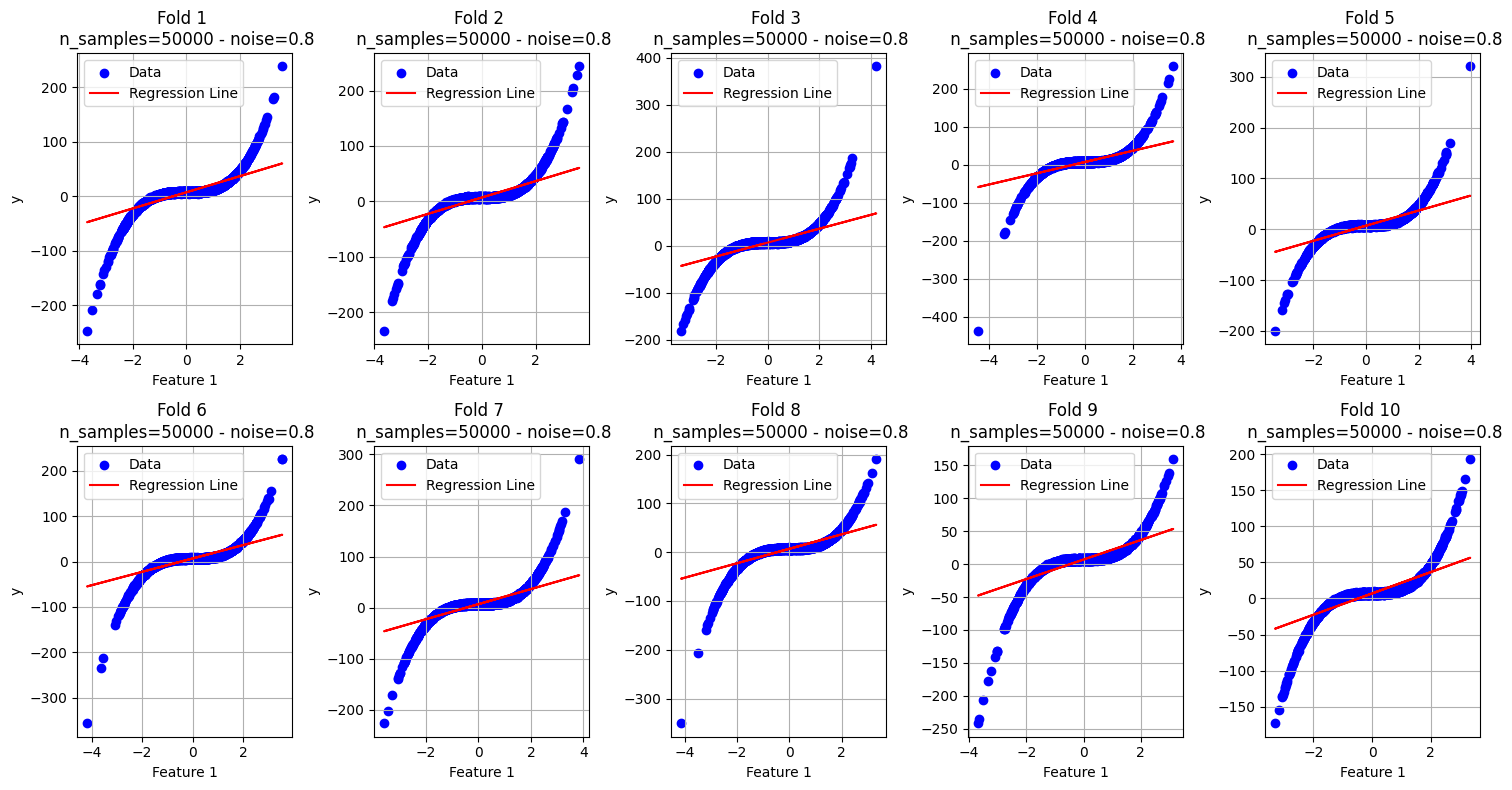

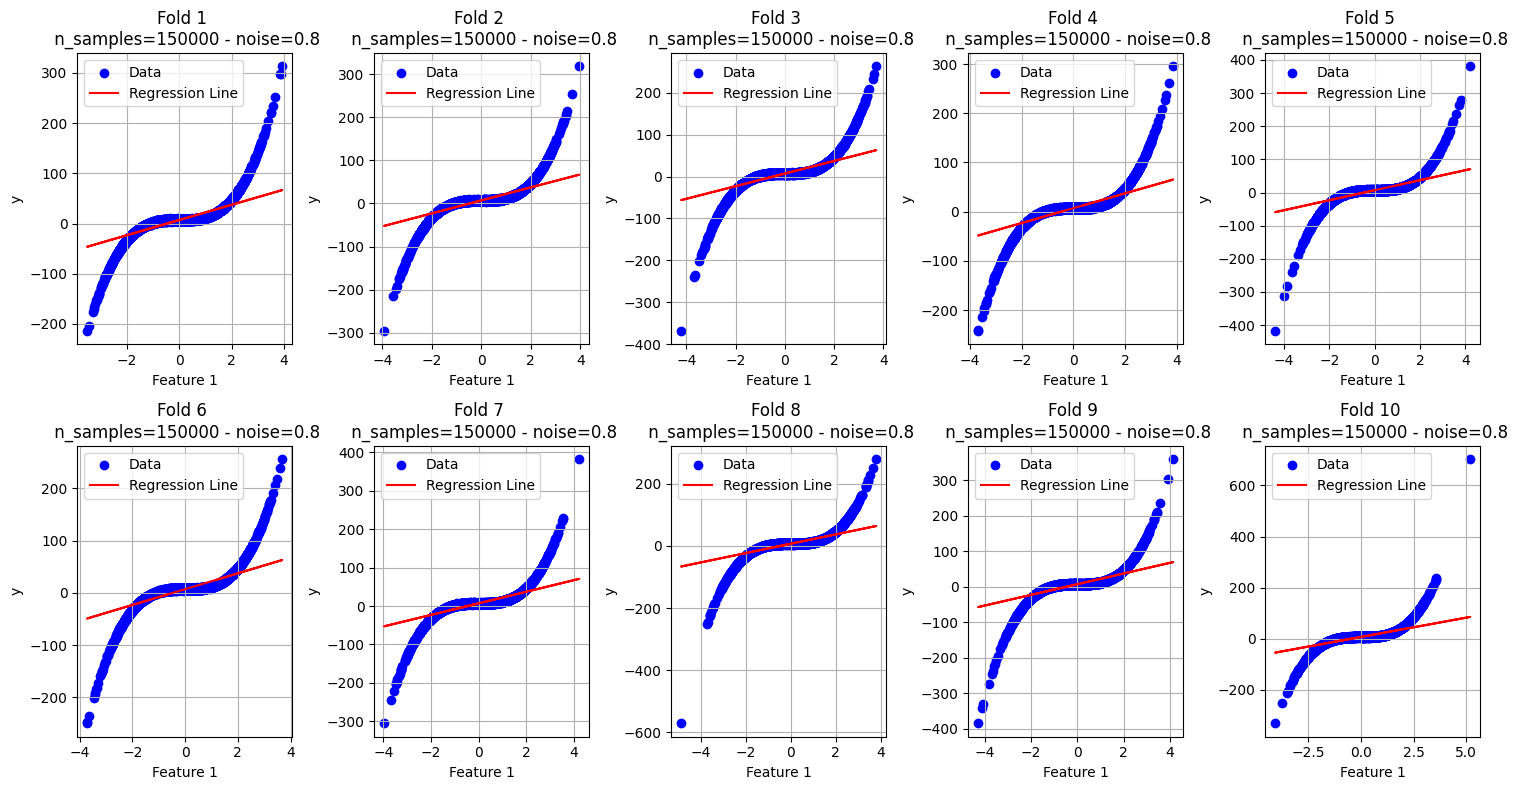

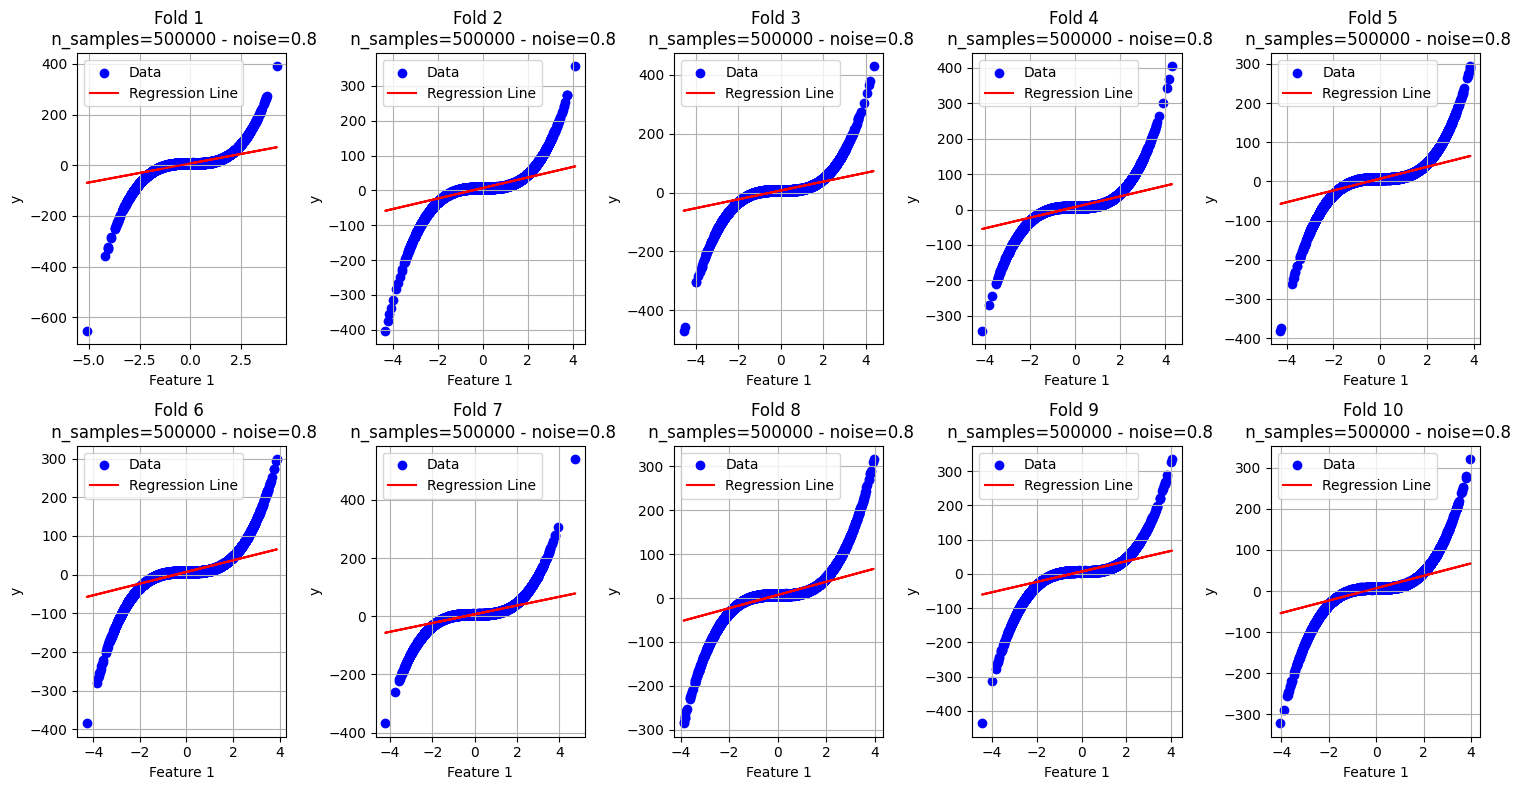

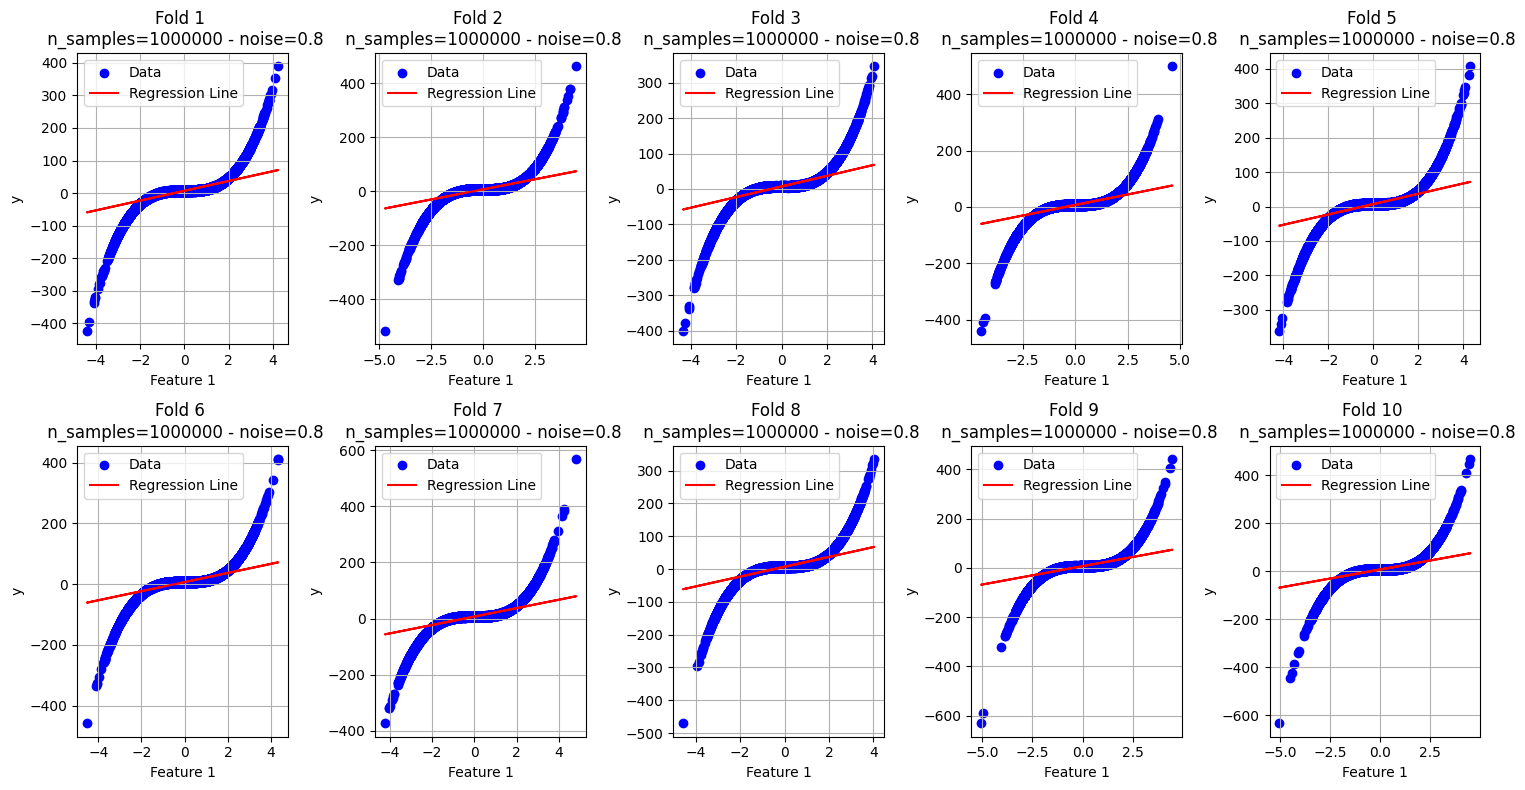

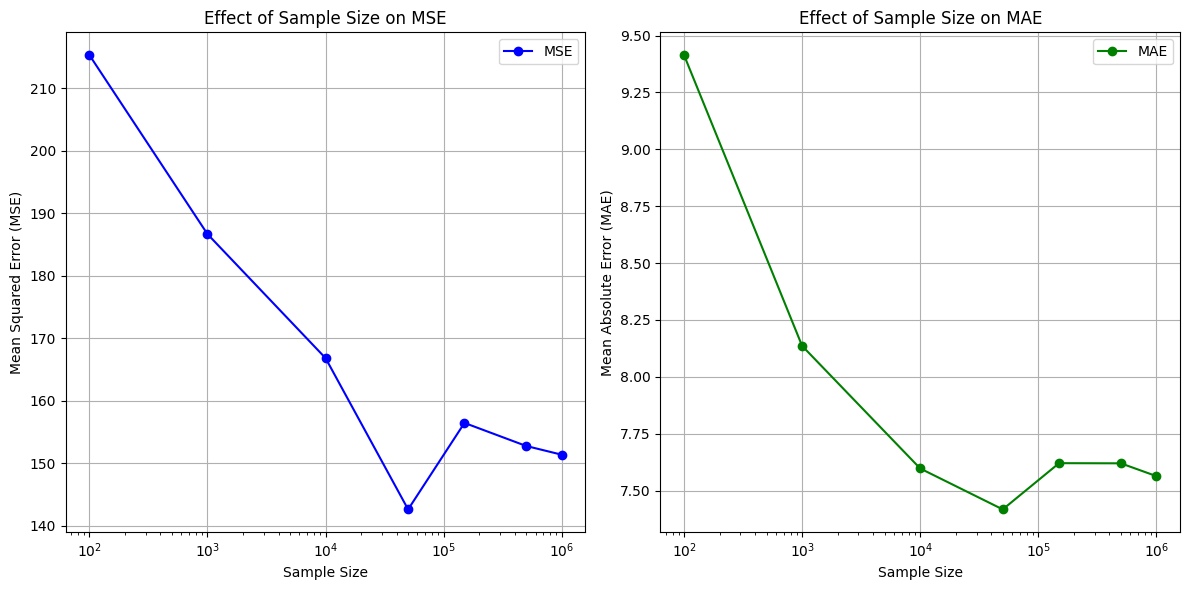

In [ ]:
# Run Experiment 1
experiment_sample_size_effect(noise=0.8, nonlinear=True)

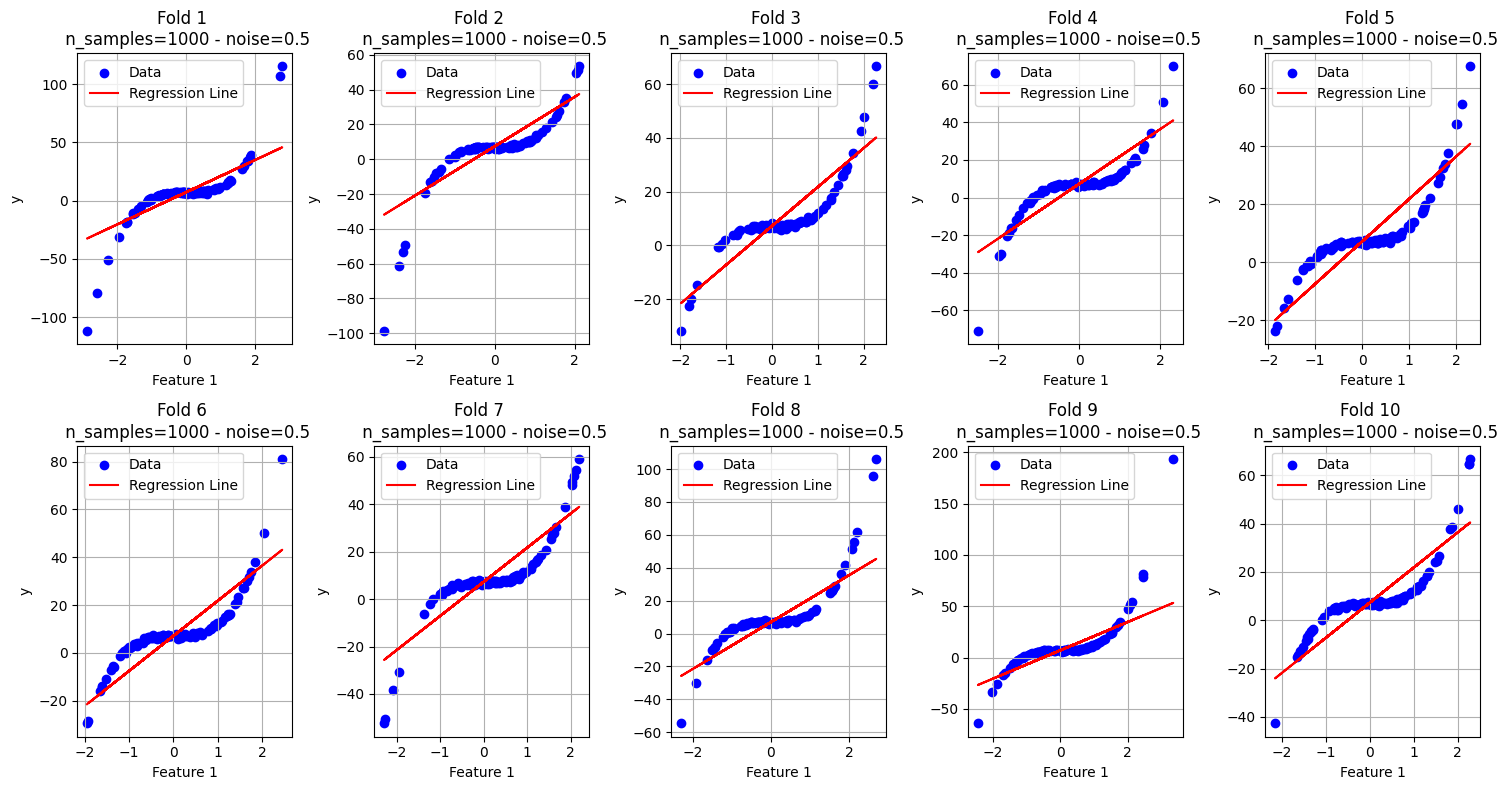

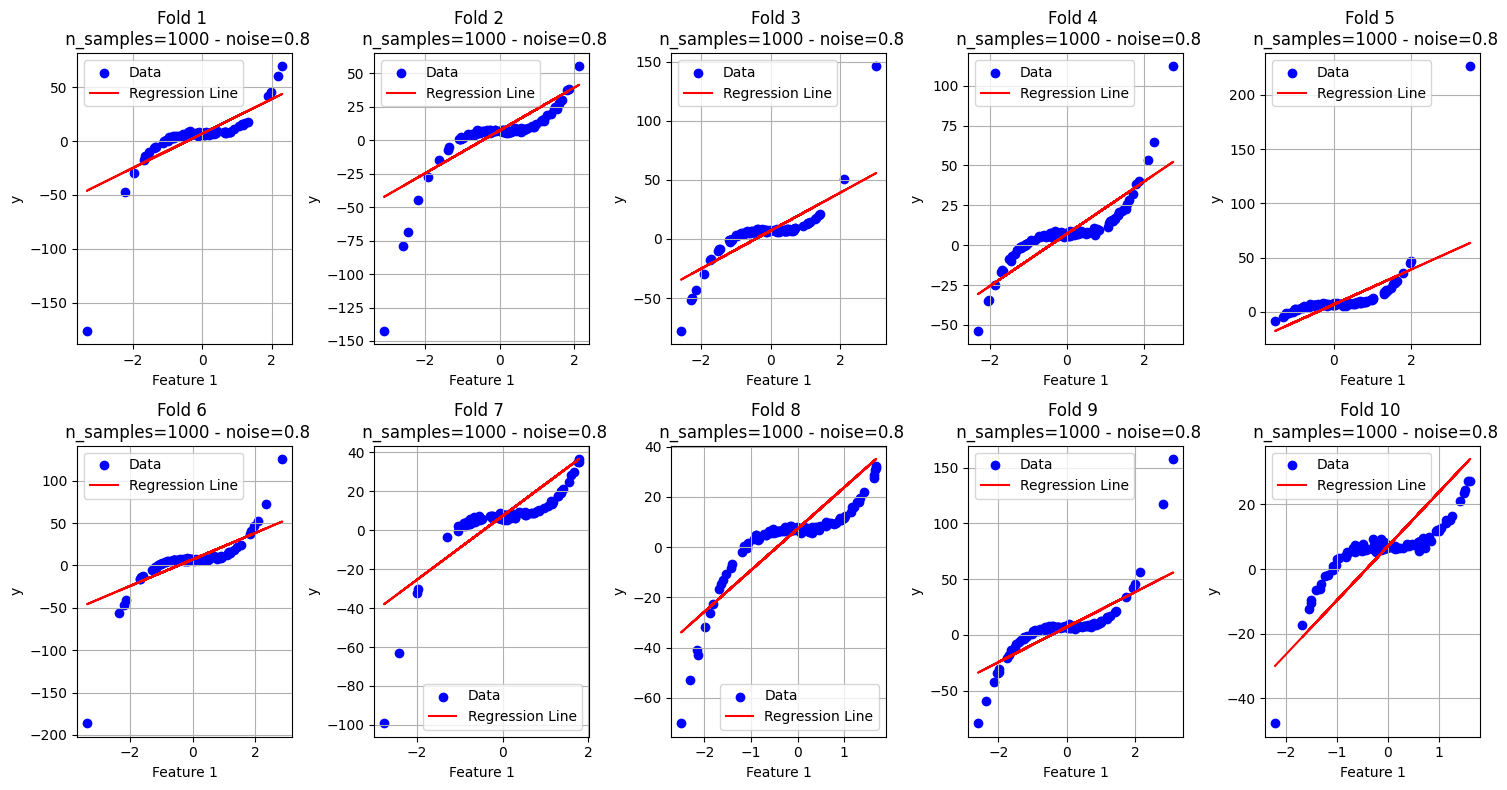

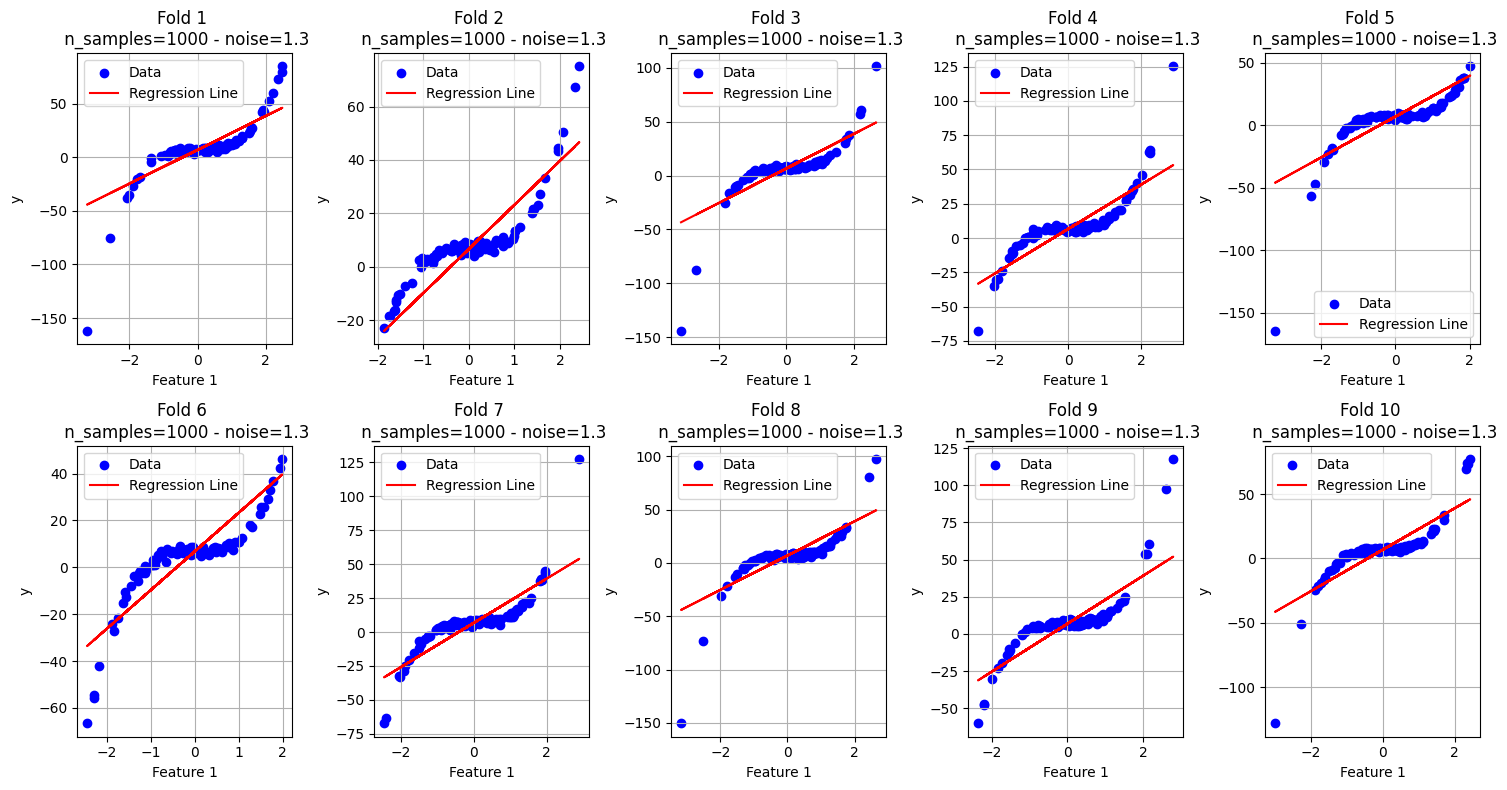

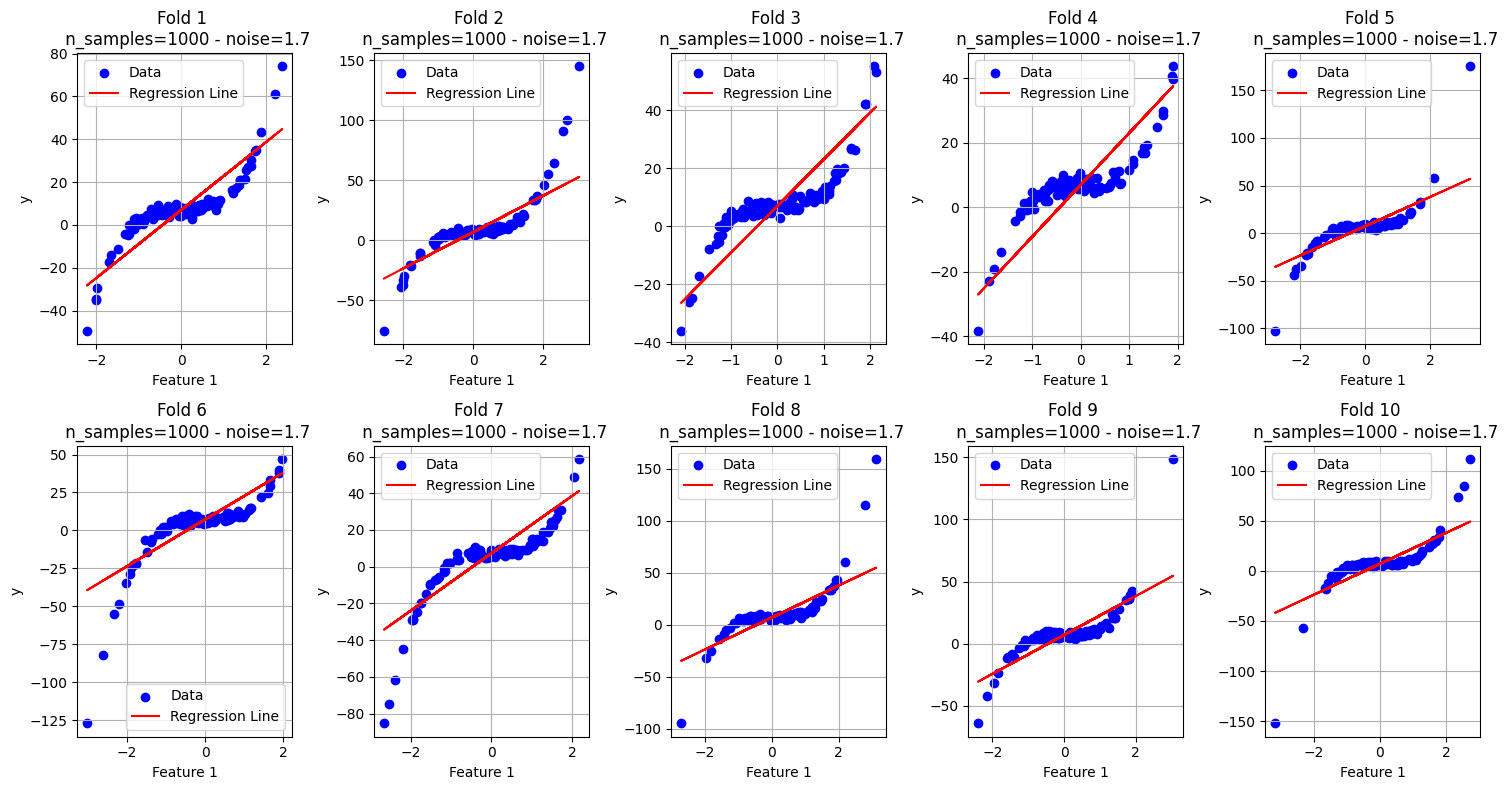

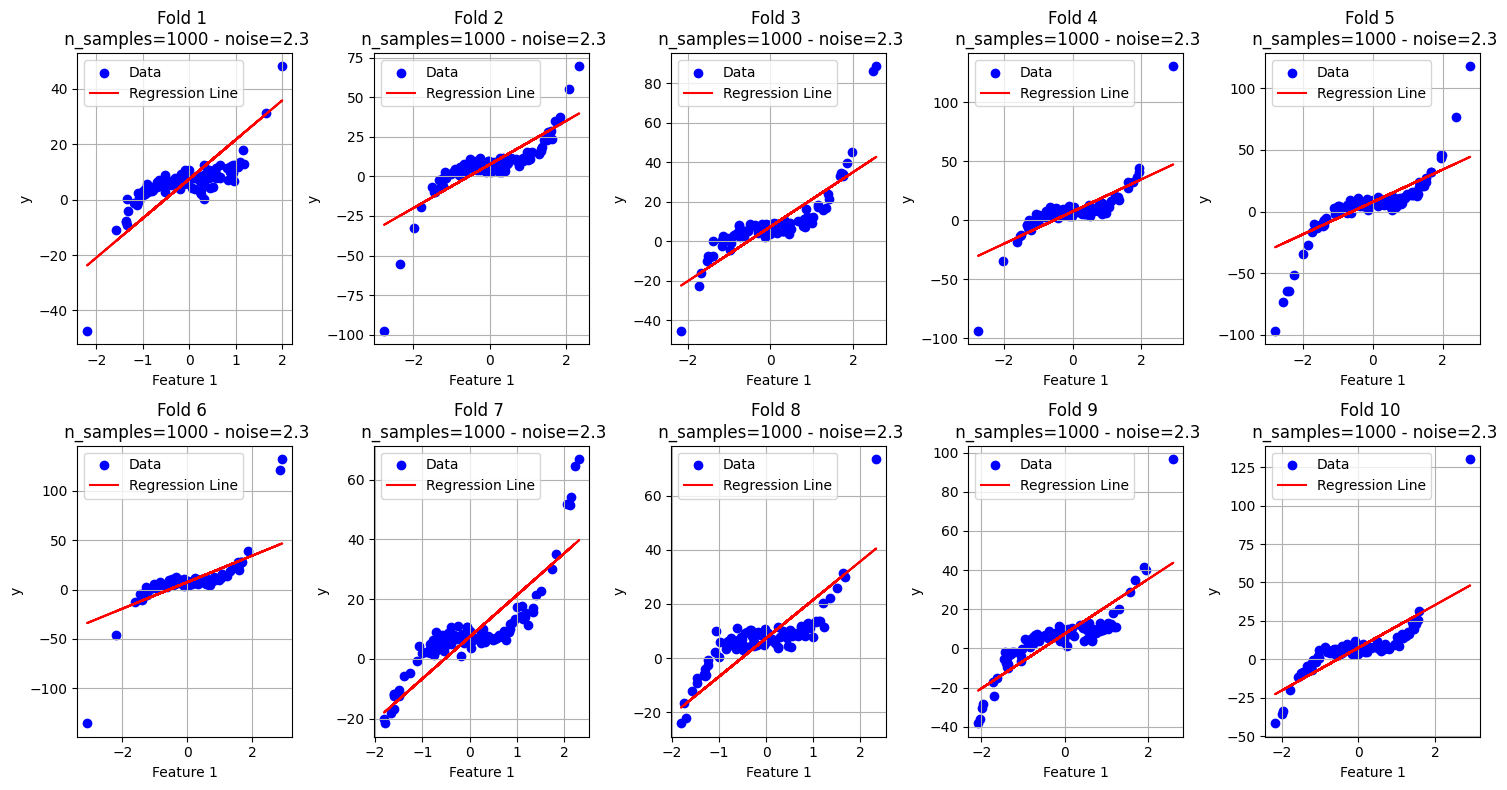

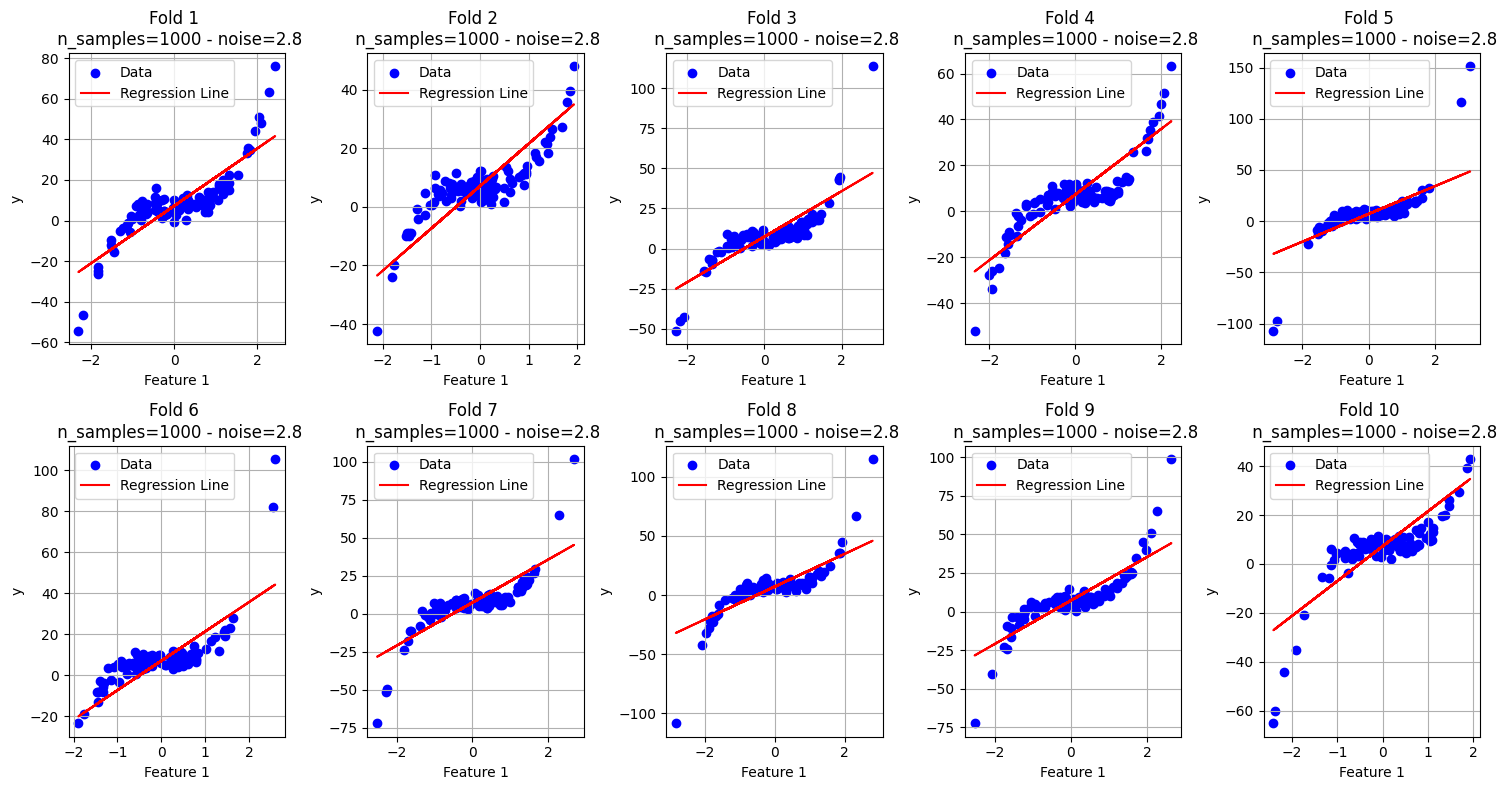

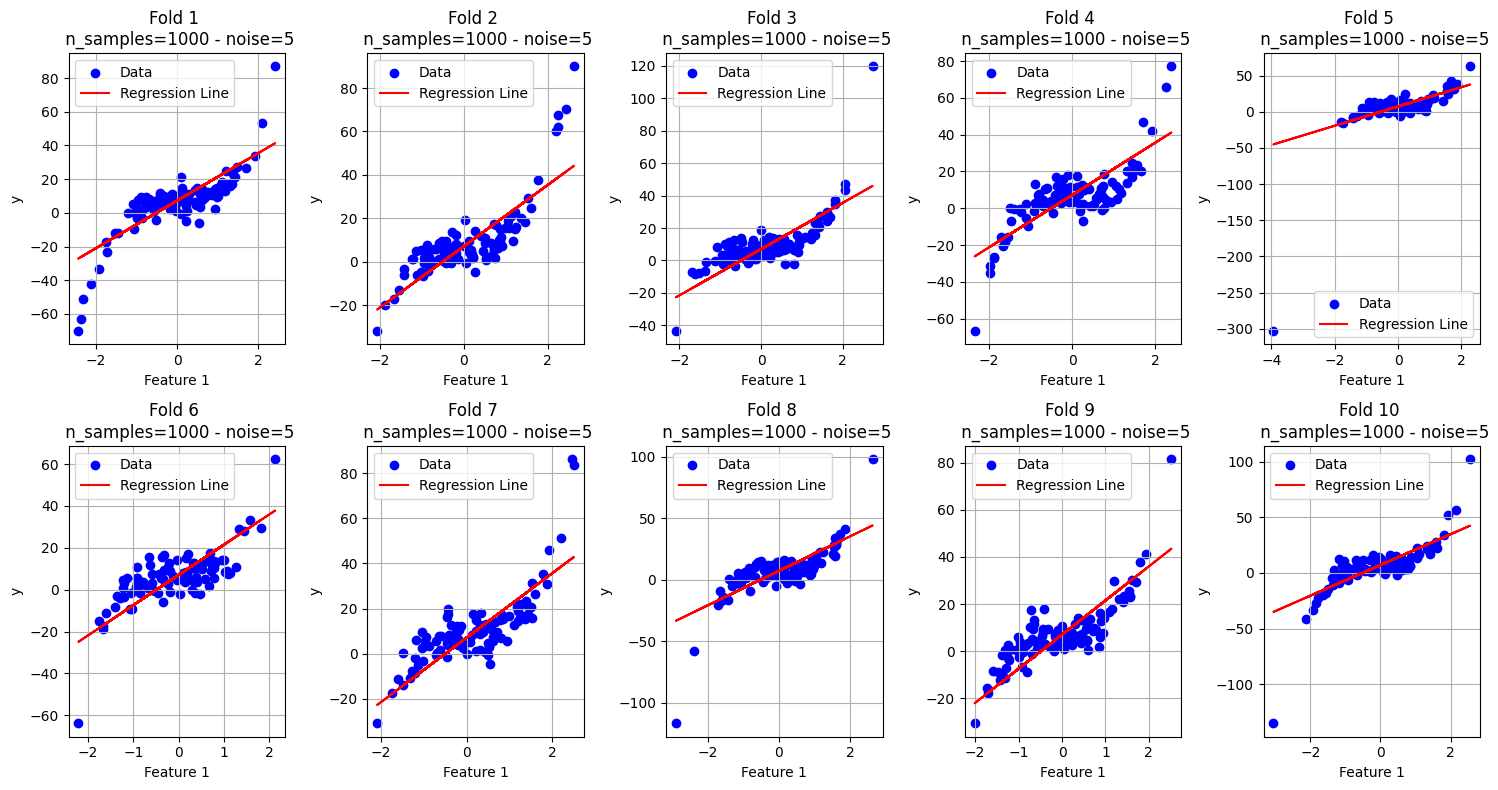

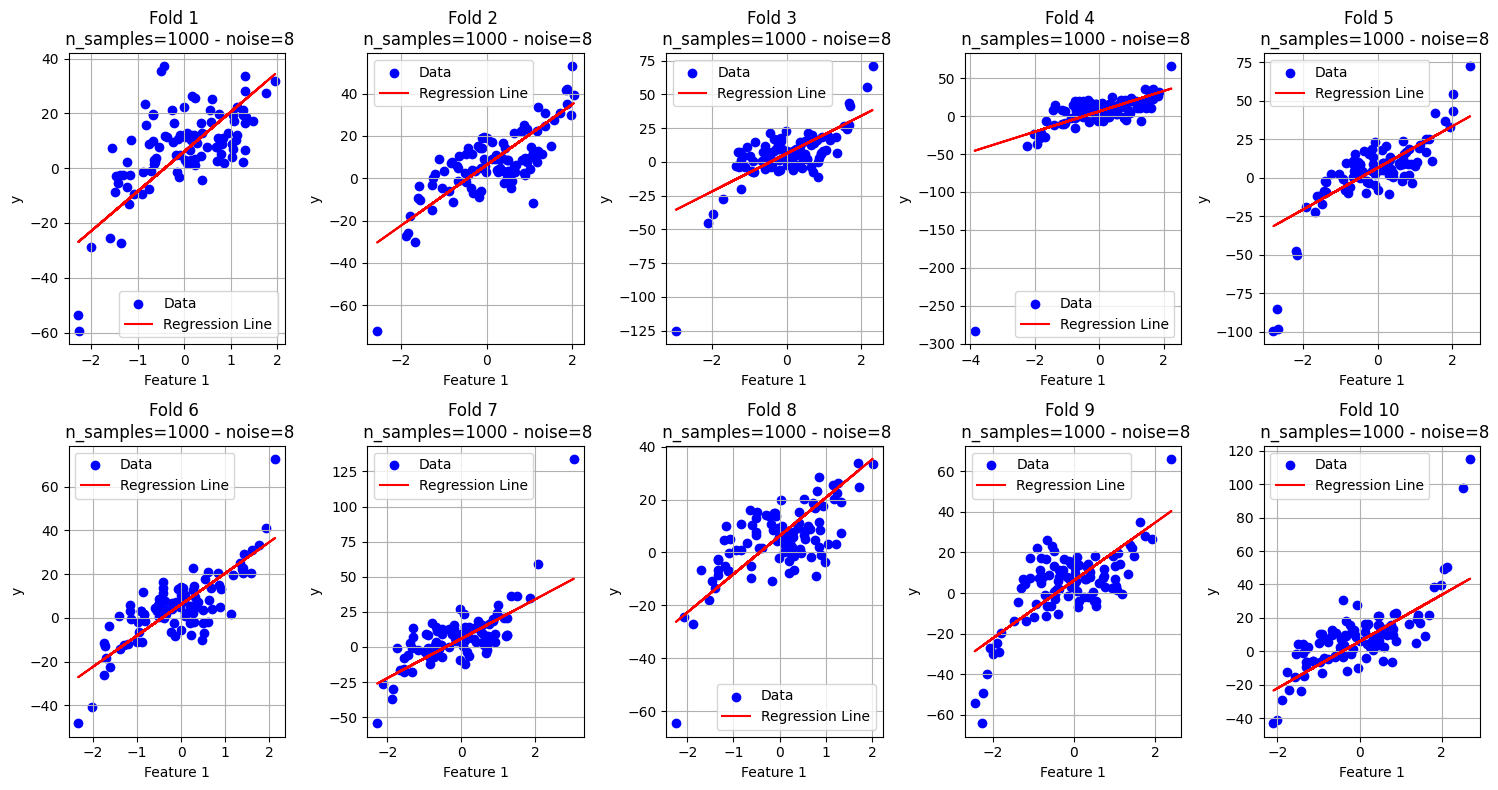

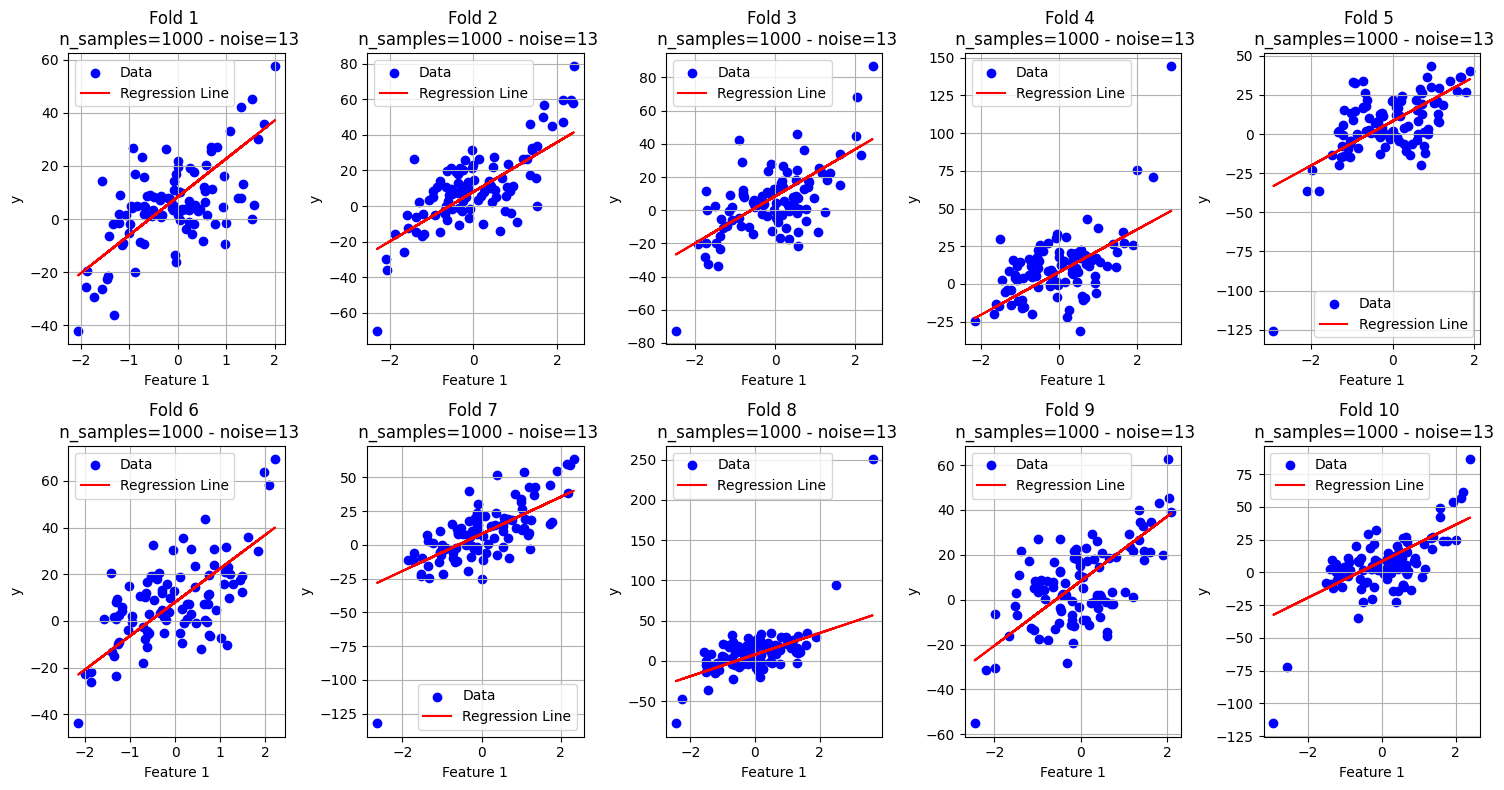

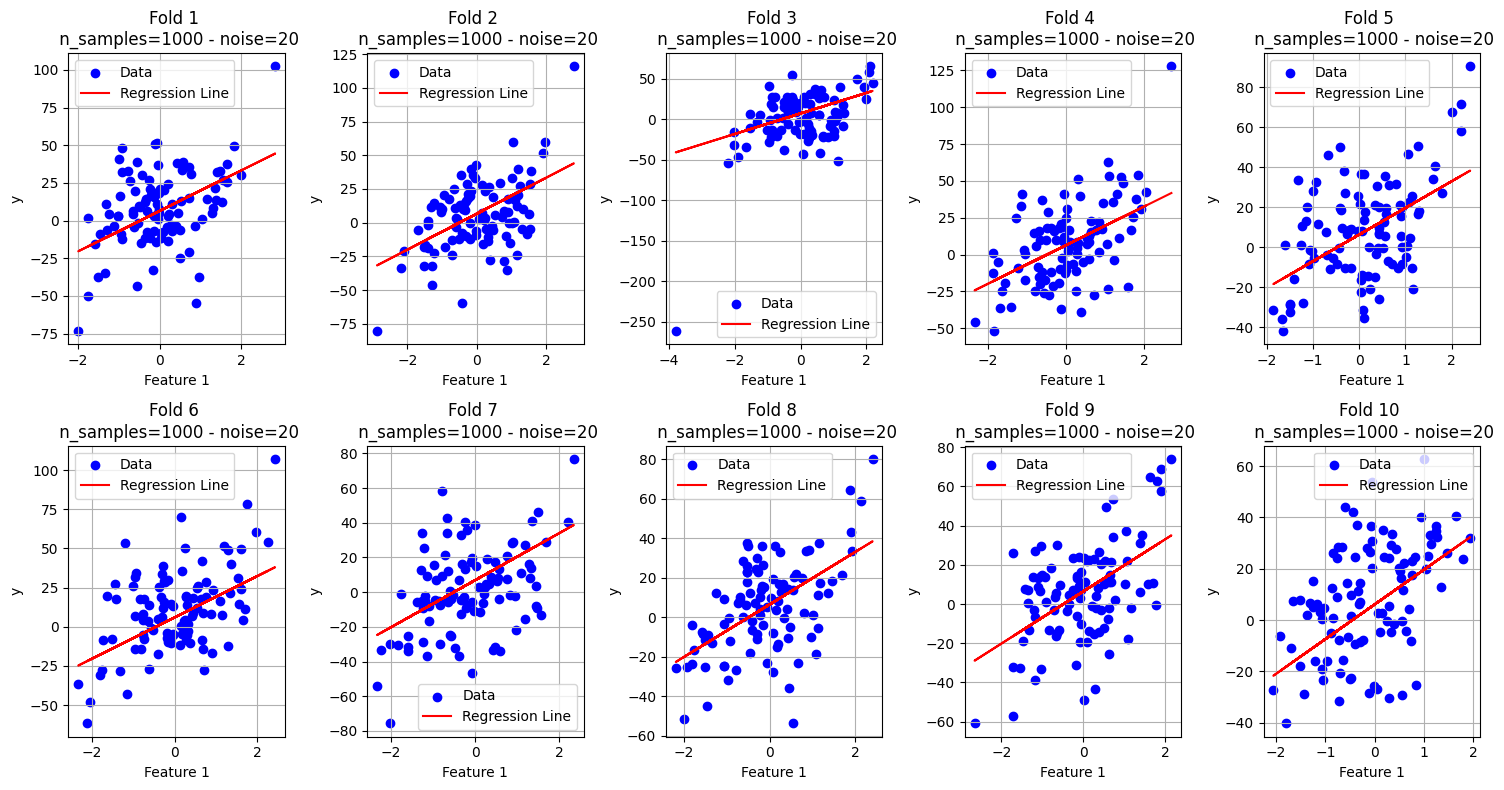

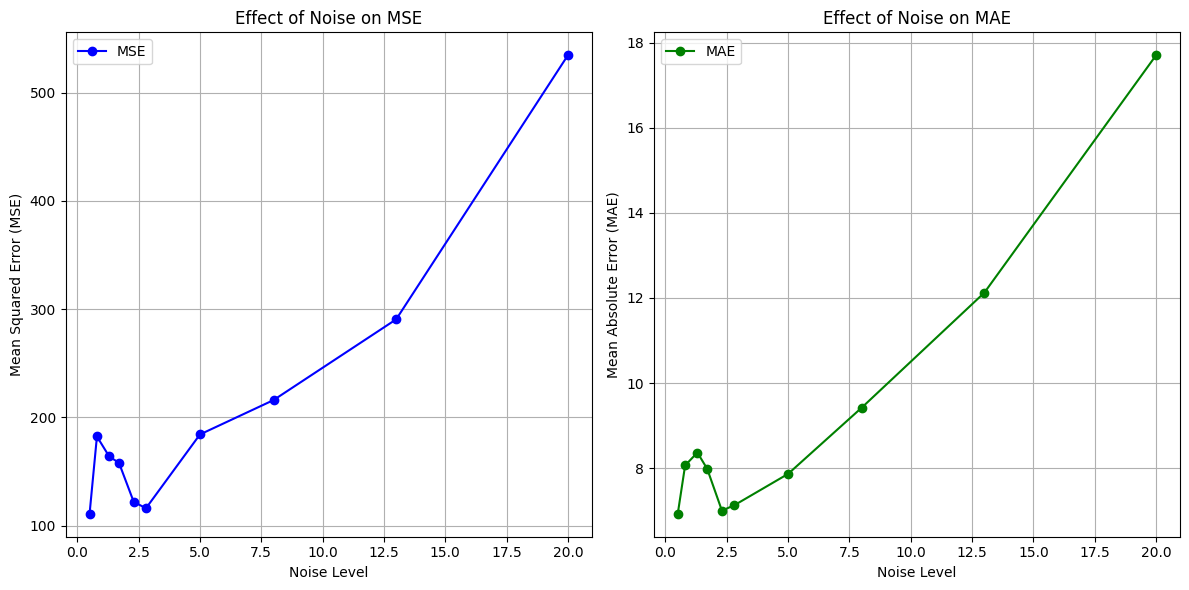

In [ ]:
# Run Experiment 2
experiment_noise_effect(n_samples=1000, nonlinear=True)